In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statsmodels.api as sm
import plotly.express as px

In [17]:
#define working directory
os.chdir("E:/Kurs/Data Glacier/Week 7")

In [18]:
# read and merge datasets
df1 = pd.read_csv('Age_Country.csv')
df2 = pd.read_csv('Education_Languages.csv')
df3 = pd.read_csv('Gender_SatRate.csv')
df4 = pd.read_csv('Marriage_Children.csv')

merged_df = pd.merge(df1, df2, on='Name', how='outer')
merged_df = pd.merge(merged_df, df3, on='Name', how='outer')
merged_df = pd.merge(merged_df, df4, on='Name', how='outer')

# write the merged dataframe to a new CSV file
merged_df.to_csv('master_data.csv', index=False)

C:\Users\ejot9\AppData\Local\Temp\ipykernel_19264\1445709634.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Email_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, df4, on='Name', how='outer')


In [19]:
#Read the master data
df = pd.read_csv("master_data.csv")

In [7]:
# First 5 in our dataset
df.head()

,Name,Email_x,Age,Country,Email_y,Education Level,Number of Languages Spoken,Email_x.1,Gender,Satisfaction Rate,Email_y.1,Marital Status,Number of Children
0,Landon Patel,landonpatel@gmail.com,32,United States,landonpatel@gmail.com,Bachelor's Degree,2,landonpatel@gmail.com,Male,8,landonpatel@gmail.com,Single,3
1,Cassidy Turner,cassidyturner@yahoo.com,24,Canada,cassidyturner@yahoo.com,Master's Degree,1,cassidyturner@yahoo.com,Non-binary,9,cassidyturner@yahoo.com,Married,4
2,Axl Thompson,axl.thompson@hotmail.com,43,United States,axl.thompson@hotmail.com,High School,3,axl.thompson@hotmail.com,Male,7,axl.thompson@hotmail.com,Single,1
3,Ivy Wilson,ivywilson@gmail.com,58,United Kingdom,ivywilson@gmail.com,Bachelor's Degree,4,ivywilson@gmail.com,Female,6,ivywilson@gmail.com,Divorced,0
4,Reece Scott,reece.scott@outlook.com,26,Australia,reece.scott@outlook.com,Doctorate,4,reece.scott@outlook.com,Male,4,reece.scott@outlook.com,Married,2


In [10]:
#Last 5 rows in our dataset
df.tail()

,Name,Email_x,Age,Country,Email_y,Education Level,Number of Languages Spoken,Email_x.1,Gender,Satisfaction Rate,Email_y.1,Marital Status,Number of Children
82,Ryann Davis,ryann.davis@gmail.com,24,Canada,ryann.davis@gmail.com,Bachelor's Degree,1,ryann.davis@gmail.com,Female,10,ryann.davis@gmail.com,Single,0
83,Lara Johnson,lara.johnson@yahoo.com,54,United States,lara.johnson@yahoo.com,Master's Degree,3,lara.johnson@yahoo.com,Female,3,lara.johnson@yahoo.com,Married,2
84,Paislee King,paislee_king@hotmail.com,61,United Kingdom,paislee_king@hotmail.com,High School,1,paislee_king@hotmail.com,Female,4,paislee_king@hotmail.com,Single,1
85,Kole Scott,kole_scott@gmail.com,63,Australia,kole_scott@gmail.com,Bachelor's Degree,4,kole_scott@gmail.com,Male,8,kole_scott@gmail.com,Married,3
86,Alaia Taylor,alaia_taylor@yahoo.com,23,United States,alaia_taylor@yahoo.com,Doctorate,2,alaia_taylor@yahoo.com,Female,2,alaia_taylor@yahoo.com,Married,4


In [11]:
#Master Data General information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name                        87 non-null     object
 1   Email_x                     87 non-null     object
 2   Age                         87 non-null     int64 
 3   Country                     87 non-null     object
 4   Email_y                     87 non-null     object
 5   Education Level             87 non-null     object
 6   Number of Languages Spoken  87 non-null     int64 
 7   Email_x.1                   87 non-null     object
 8   Gender                      87 non-null     object
 9   Satisfaction Rate           87 non-null     int64 
 10  Email_y.1                   87 non-null     object
 11  Marital Status              87 non-null     object
 12  Number of Children          87 non-null     int64 
dtypes: int64(4), object(9)
memory usage: 9.0+ KB


In [12]:
#Correlation between numerical columns
df.corr()

,Age,Number of Languages Spoken,Satisfaction Rate,Number of Children
Age,1.000000,0.125291,0.071077,-0.081498
Number of Languages Spoken,0.125291,1.000000,-0.090605,-0.074881
Satisfaction Rate,0.071077,-0.090605,1.000000,-0.035048
Number of Children,-0.081498,-0.074881,-0.035048,1.000000


In [15]:
#Size of Data
df.size

1131

In [26]:
#Import columns for duplication test
duplicates = df.duplicated()

In [27]:
# Check for Duplicates
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Name, Email_x, Age, Country, Email_y, Education Level, Number of Languages Spoken, Email_x.1, Gender, Satisfaction Rate, Email_y.1, Marital Status, Number of Children]
Index: []


[Text(0, 0, 'Age'),
 Text(1, 0, 'Number of Languages Spoken'),
 Text(2, 0, 'Satisfaction Rate'),
 Text(3, 0, 'Number of Children')]

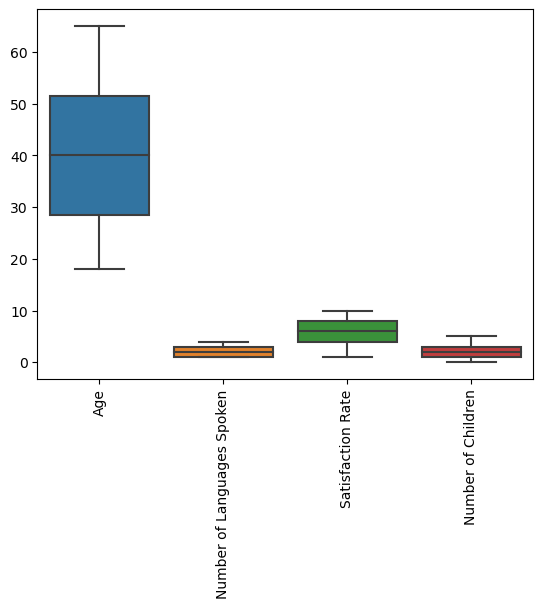

In [38]:
#Check for outliers
ax = sns.boxplot(data=df)

# Rotate the x-axis labels
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=90)

In [39]:
# Check for missing values
missing_values = df.isnull().sum()

In [40]:
# Display the count of missing values for each column
print(missing_values)

Name                          0
Email_x                       0
Age                           0
Country                       0
Email_y                       0
Education Level               0
Number of Languages Spoken    0
Email_x.1                     0
Gender                        0
Satisfaction Rate             0
Email_y.1                     0
Marital Status                0
Number of Children            0
dtype: int64


In [42]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number')

In [43]:
# Calculate the skewness for each numeric column
skewness = numeric_columns.skew()

In [44]:
# Display the skewness values
print(skewness)

Age                           0.071673
Number of Languages Spoken    0.224759
Satisfaction Rate            -0.178100
Number of Children            0.330569
dtype: float64


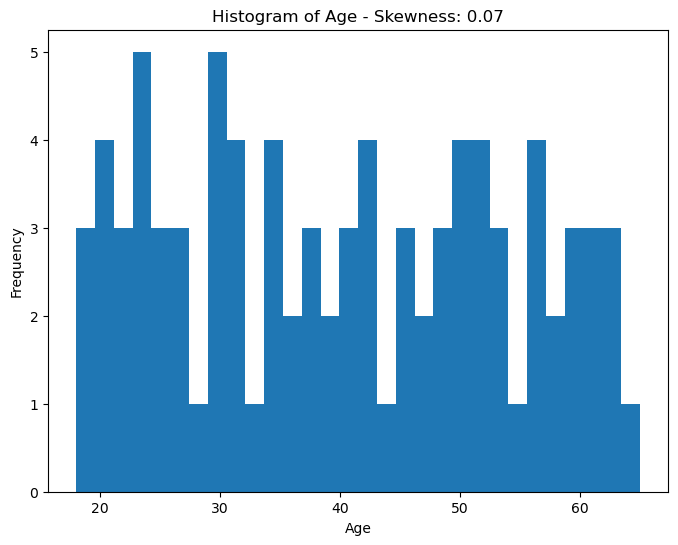

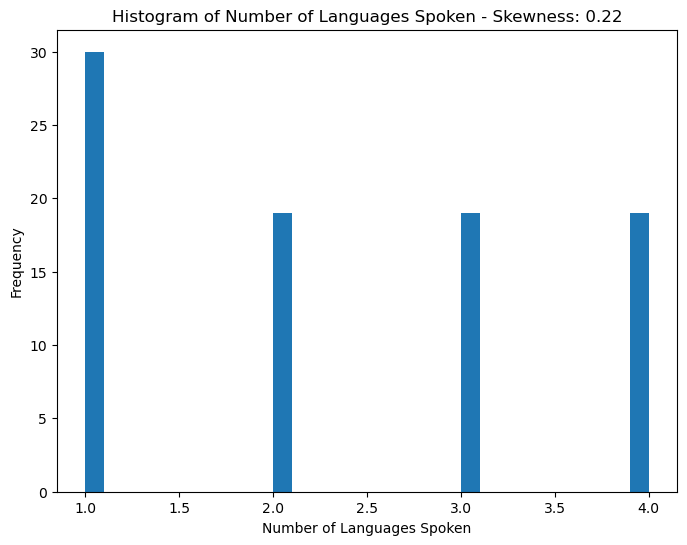

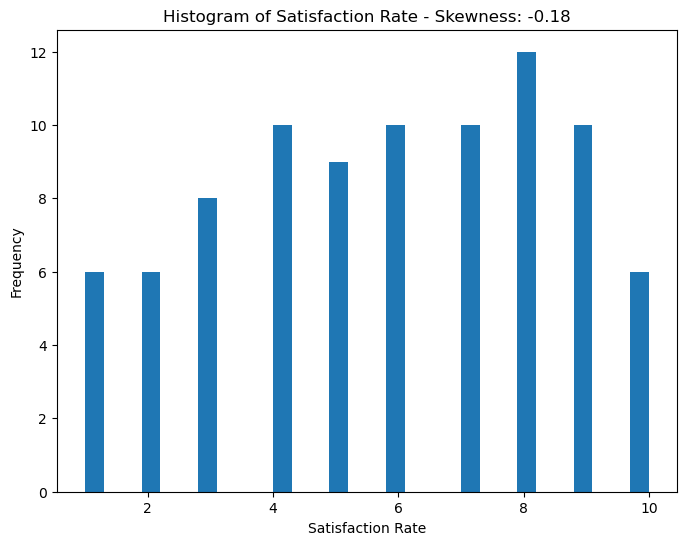

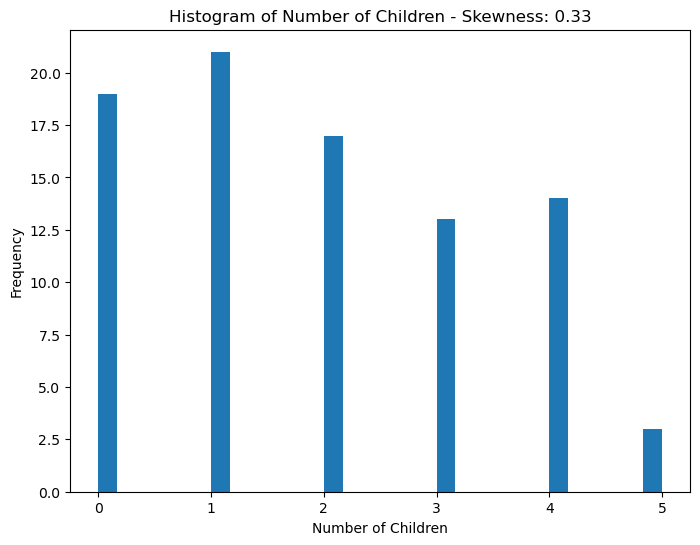

In [52]:
# Iterate over each numeric column and plot histogram
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} - Skewness: {round(df[column].skew(), 2)}')